In [59]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [54]:
# Loading rainfall data
pr = xr.open_dataset('Paraguay_combined.nc')
Paraguay_rf = pr.where(pr != -99.0)
Paraguay_rf=pr.precip

In [4]:
month_data = Paraguay_rf.groupby('datetime.month')
year_data = Paraguay_rf.groupby('datetime.year')

In [5]:
#Question 1

In [24]:
# calculating;
#monthly rainfall totals
mon_rainfall_totals = month_data.sum('datetime')

# monthly climatologies rainfall totals
mon_climo_totals = month_data.sum('datetime').mean('month')


In [7]:
#Question 2

In [55]:
#Calculating;
# annual totals
annual_totals = year_data.sum()

# annual climatology totals
annual_climo_totals = year_data.sum('datetime').mean('year')


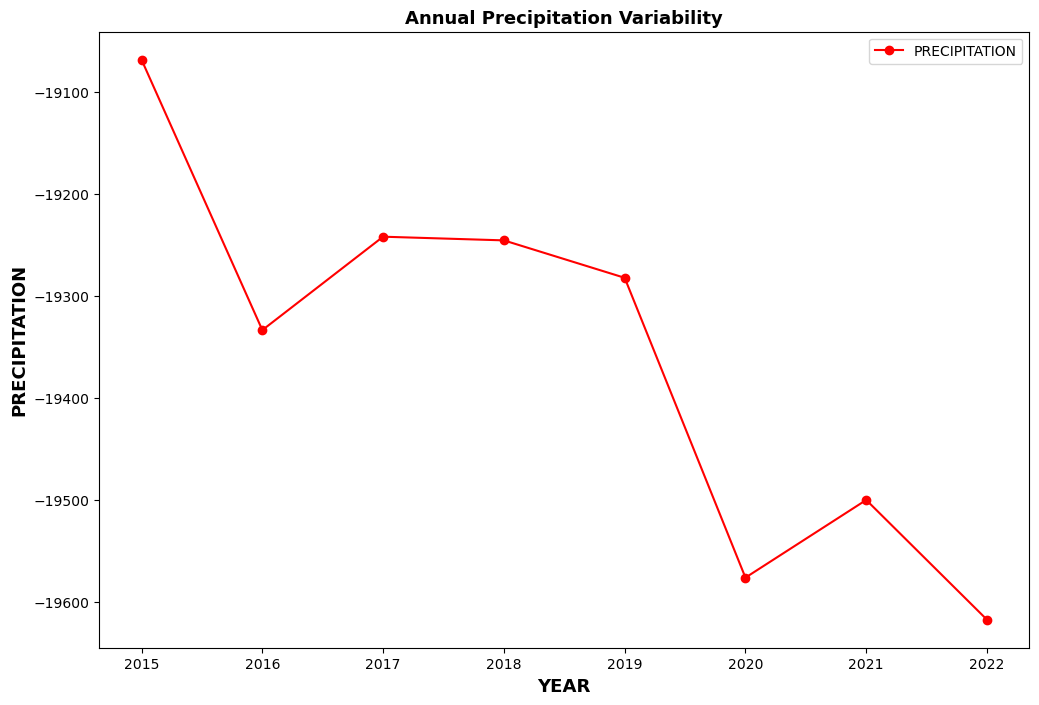

In [72]:
#plotting time series for annual climatologies
fig,ax = plt.subplots(figsize = (12,8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year, annual_totals.mean(['lon','lat']),
         color = 'RED', lw = 1.5 ,
         label= 'PRECIPITATION',marker='o')
ax.set_title('Annual Precipitation Variability', fontweight = 'bold', fontsize=13 ,color = 'Black')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 13, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 13, color= 'Black')
plt.legend()


In [90]:
#Question 3

#DRY days per year
dry_days_year = Paraguay_rf.where(Paraguay_rf < 1).groupby('datetime.year').count('datetime')

#WET days per year
wet_days_year = Paraguay_rf.where(Paraguay_rf>= 1).groupby('datetime.year').count('datetime')

#DRY days per MONTH
dry_days_mon = Paraguay_rf.where(Paraguay_rf < 1).groupby('datetime.month').count('datetime')

#WET days per MONTH
wet_days_mon = Paraguay_rf.where(Paraguay_rf >= 1).groupby('datetime.month').count('datetime')

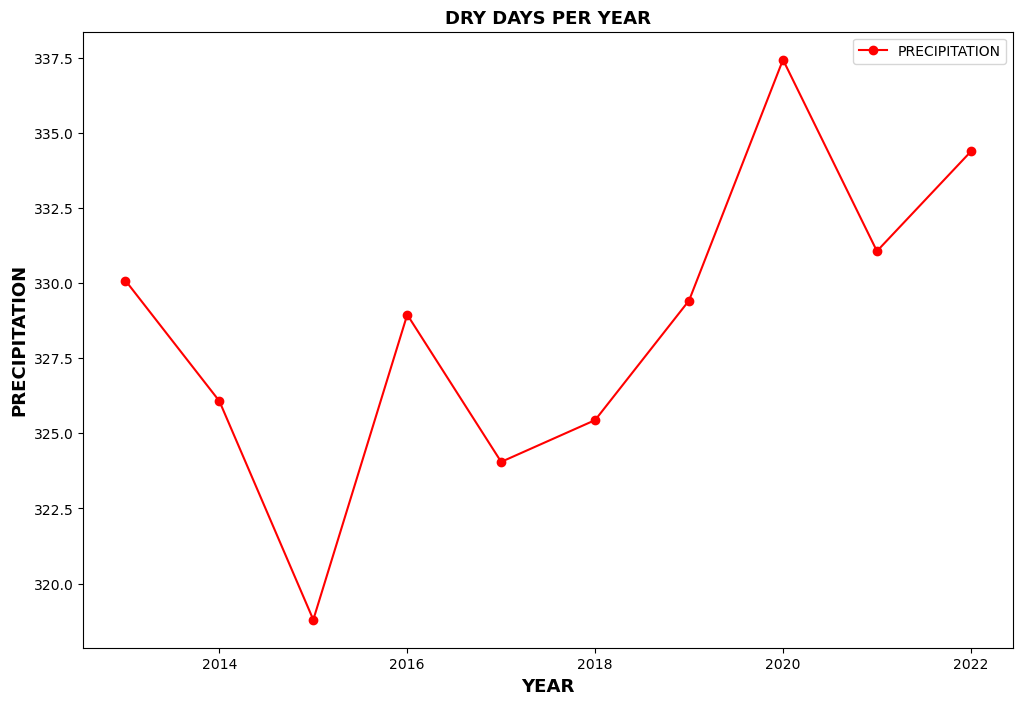

<Figure size 640x480 with 0 Axes>

In [45]:
#plotting time series for drydays per year
fig,ax = plt.subplots(figsize = (12,8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,dry_days_year.mean(['lon','lat']),
         color = 'red', lw = 1.5 ,
         label= 'PRECIPITATION',
         marker='o')
ax.set_title('DRY DAYS PER YEAR', fontweight = 'bold', fontsize=13 ,color = 'BLACK')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 13, color= 'BLACK')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 13, color= 'BLACK')
plt.legend()
plt.show()
plt.savefig('1a.png');

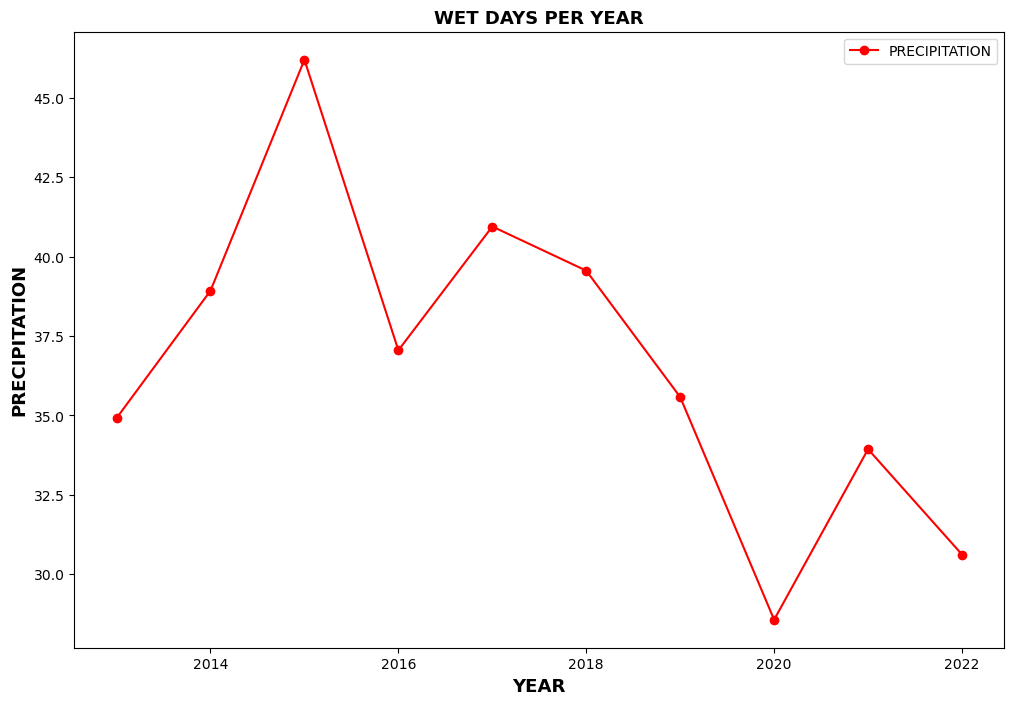

<Figure size 640x480 with 0 Axes>

In [52]:
#plotting time series for wetdays per year
fig,ax = plt.subplots(figsize = (12,8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(annual_totals.year,wet_days_year.mean(['lon','lat']),
         color = 'red', lw = 1.5 ,
         label= 'PRECIPITATION',marker='o')
ax.set_title('WET DAYS PER YEAR', fontweight = 'bold', fontsize=13 ,color = 'Black')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 13, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 13, color= 'black')
plt.legend()
plt.show()
plt.savefig('2a.png');

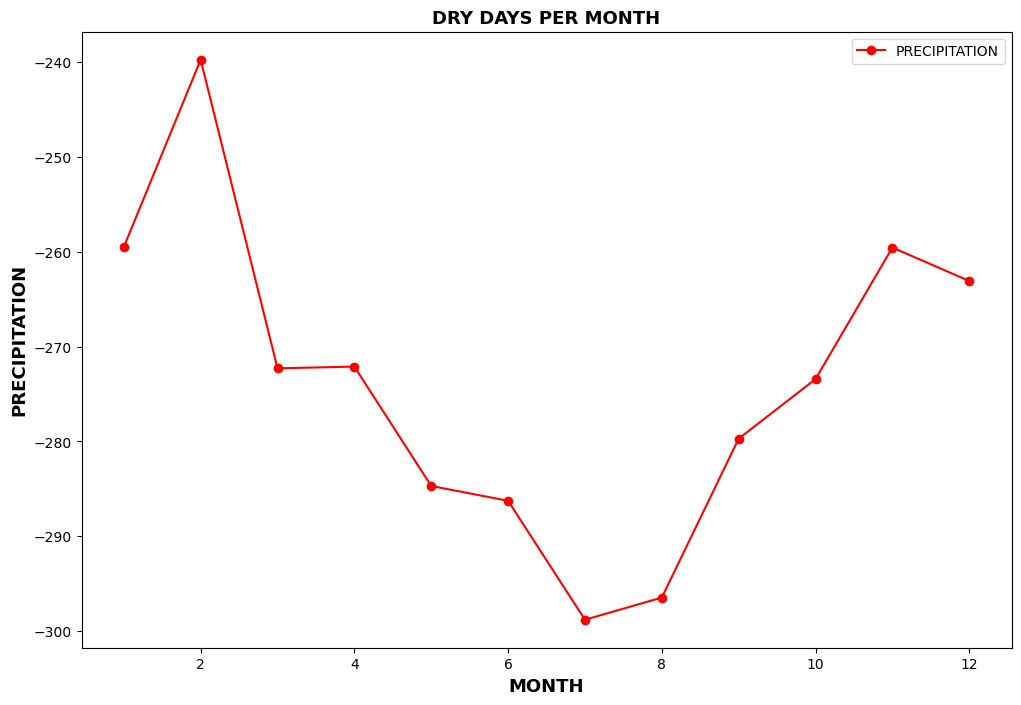

<Figure size 640x480 with 0 Axes>

In [50]:
#plotting time series for wetdays per mon
fig,ax = plt.subplots(figsize = (12,8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(mon_rainfall_totals.month, dry_days_mon.mean(['lon','lat'])*-1,
         color = 'red', lw = 1.5 ,
         label= 'PRECIPITATION',marker='o')
ax.set_title('DRY DAYS PER MONTH', fontweight = 'bold', fontsize=13 ,color = 'Black')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 13, color= 'Black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 13, color= 'black')
plt.legend()
plt.show()
plt.savefig('3a.png');

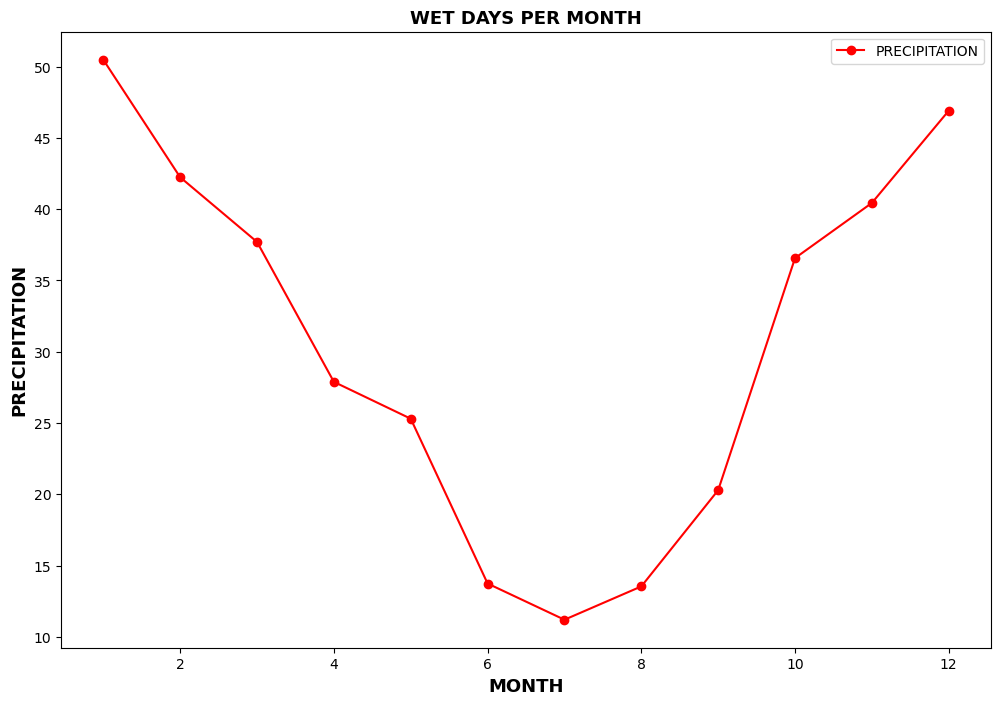

<Figure size 640x480 with 0 Axes>

In [89]:
#plotting time series for wetdays per year
fig,ax = plt.subplots(figsize = (12,8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(mon_rainfall_totals.month,wet_days_mon.mean(['lon','lat']),
         color = 'red', lw = 1.5 ,
         label= 'PRECIPITATION',marker='o')
ax.set_title('WET DAYS PER MONTH', fontweight = 'bold', fontsize=13 ,color = 'black')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 13, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 13, color= 'black')
plt.legend()
plt.show()
plt.savefig('4a.png');

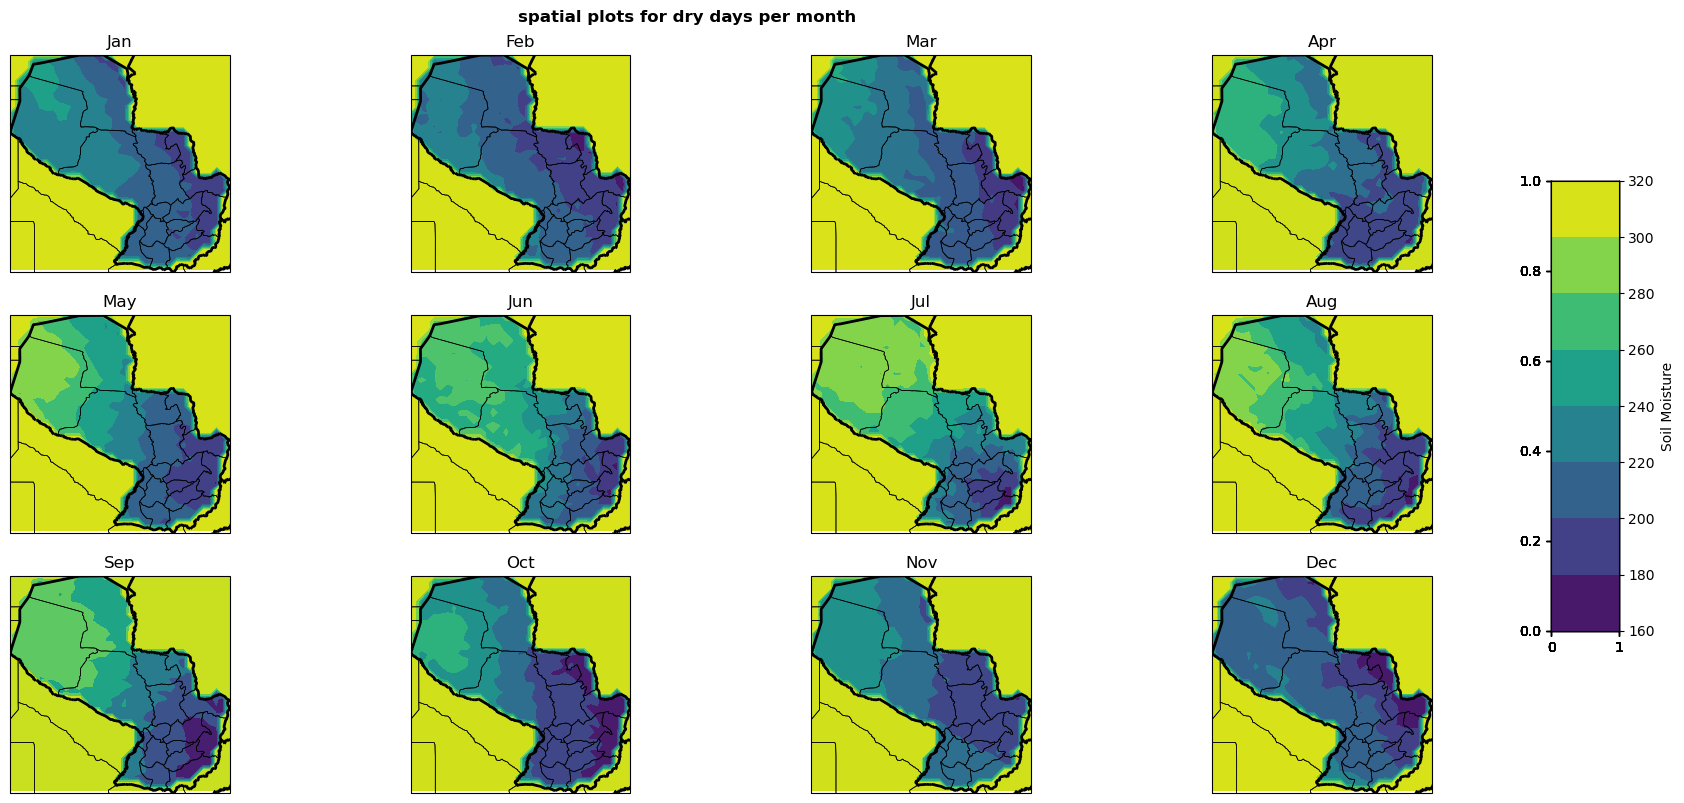

In [75]:
# spatial plots for dry days per month
fig,ax=plt.subplots(3,4,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-54.25,-62.65,-27.59,-19.29])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(dry_days_mon.lon, dry_days_mon.lat, dry_days_mon[i],
                      get_cmap='rb', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for dry days per month', fontweight='bold');
plt.savefig('6.jpeg');


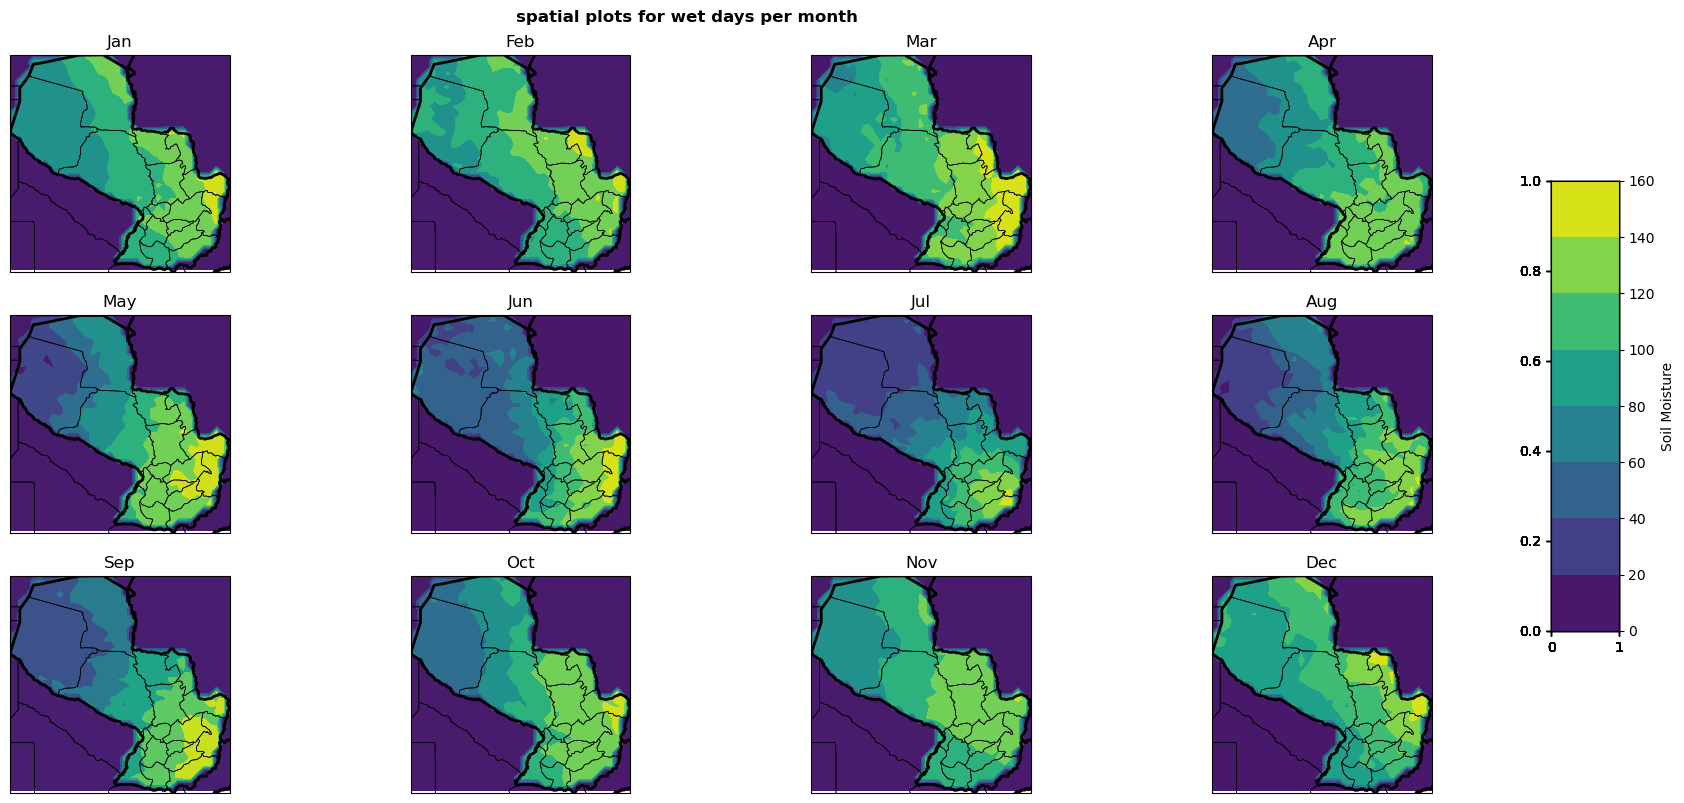

In [77]:
# spatial plots for wet days per month
fig,ax=plt.subplots(3,4,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-54.25,-62.65,-27.59,-19.29])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(wet_days_mon.lon, wet_days_mon.lat, wet_days_mon[i],
                      get_cmap='rb', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for wet days per month', fontweight='bold');
plt.savefig('5a.jpeg');

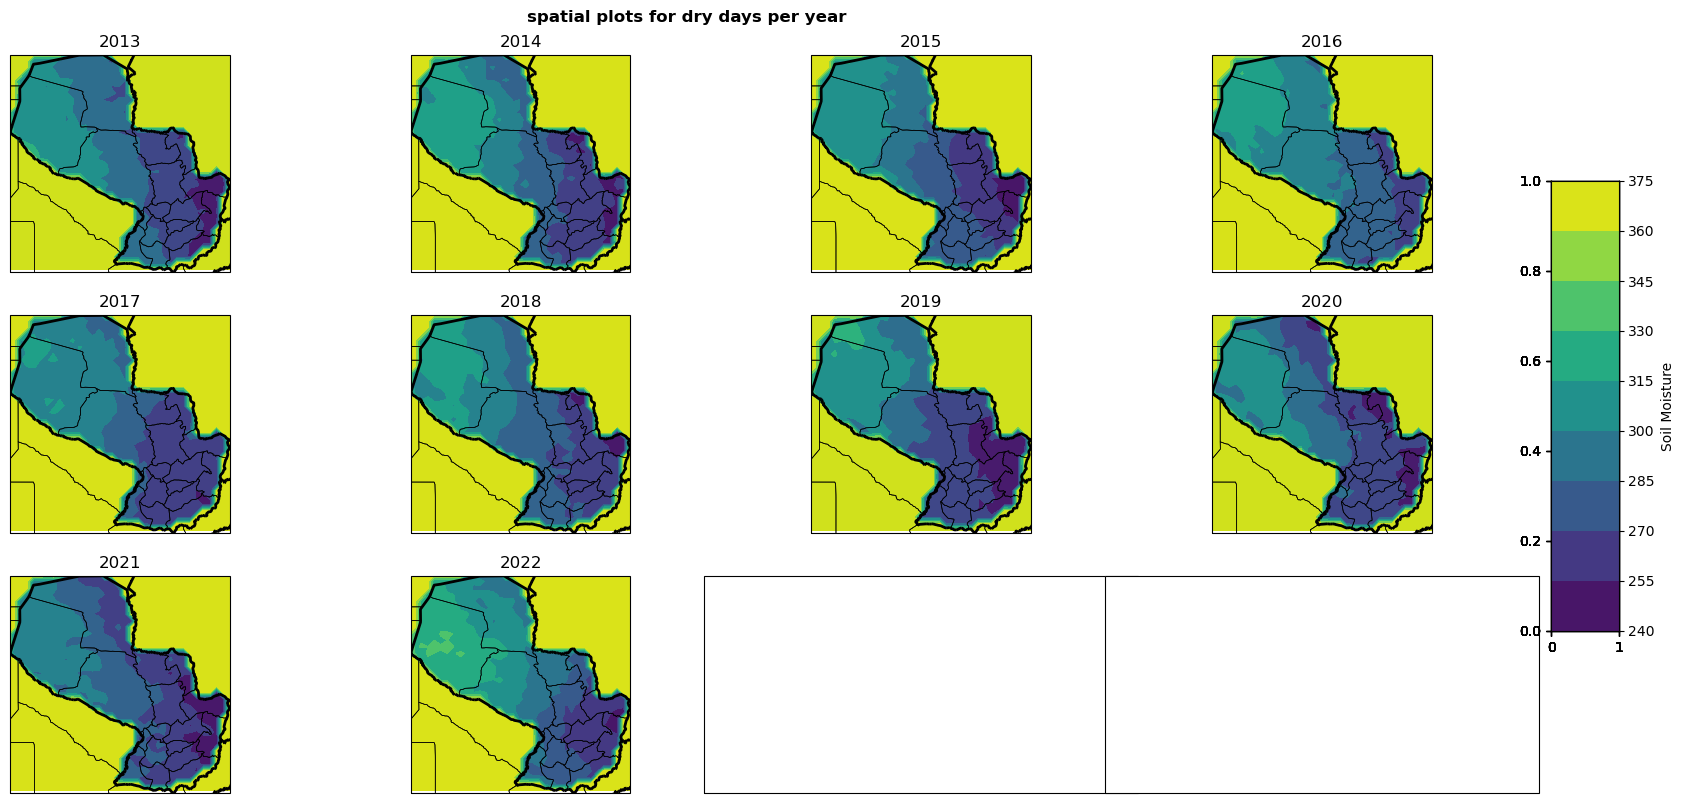

In [85]:
# spatial plots for dry days per year
fig,ax=plt.subplots(3,4,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
#month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-54.25,-62.65,-27.59,-19.29])
    
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(dry_days_year.lon, dry_days_year.lat, dry_days_year[i],
                      get_cmap='rb', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for dry days per year', fontweight='bold');
plt.savefig('7.jpeg');


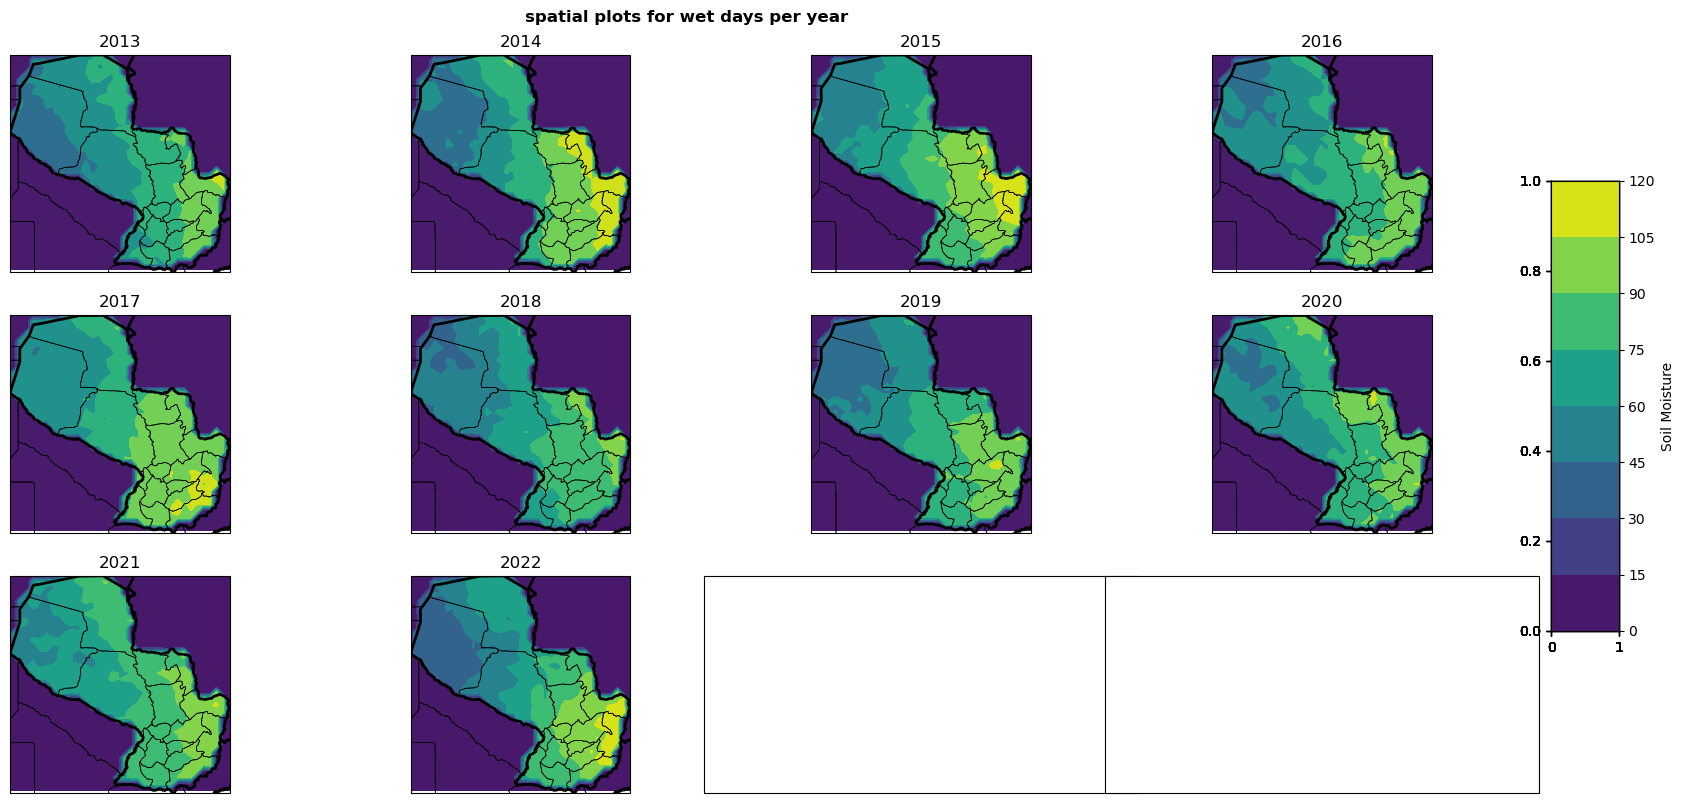

In [86]:
# spatial plots for wet days per year
fig,ax=plt.subplots(3,4,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
#month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-54.25,-62.65,-27.59,-19.29])
    
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(wet_days_year.lon, wet_days_year.lat, wet_days_year[i],
                      get_cmap='rb', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for wet days per year', fontweight='bold');
plt.savefig('9k.jpeg');


In [91]:
#Question 4
# Extreme Rainfall >10mm per year
Xtrf10 = Paraguay_rf.where(Paraguay_rf > 10).groupby('datetime.year').count('datetime')

# Extreme Rainfall >20mm per year
Xtrf20 = Paraguay_rf.where(Paraguay_rf > 20).groupby('datetime.year').count('datetime')

# Extreme Rainfall >10mm per month
Xtrf10M = Paraguay_rf.where(Paraguay_rf > 10).groupby('datetime.month').count('datetime')

# Extreme Rainfall >10mm per month
Xtrf20M = Paraguay_rf.where(Paraguay_rf > 20).groupby('datetime.month').count('datetime')

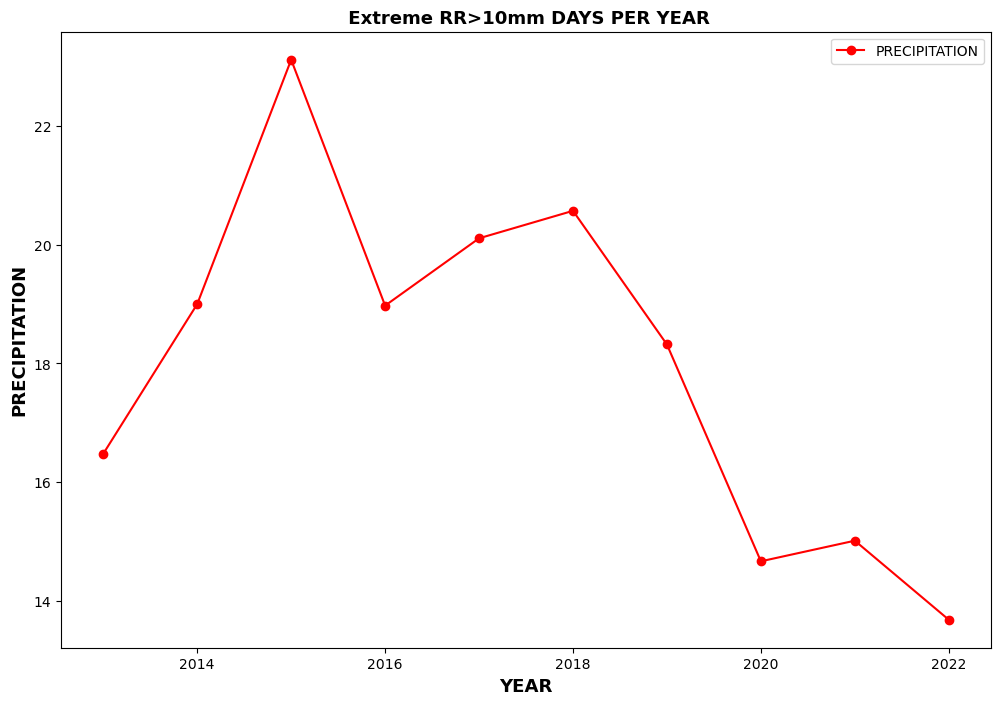

In [94]:
#plotting time series for extreme RR>10mm per year
fig,ax = plt.subplots(figsize = (12,8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xtrf10.year, Xtrf10.mean(['lon','lat']),
         color = 'red', lw = 1.5 ,
         label= 'PRECIPITATION',marker='o')
ax.set_title(' Extreme RR>10mm DAYS PER YEAR', fontweight = 'bold', fontsize=13 ,color = 'black')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 13, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 13, color= 'black')
plt.legend()
plt.show()

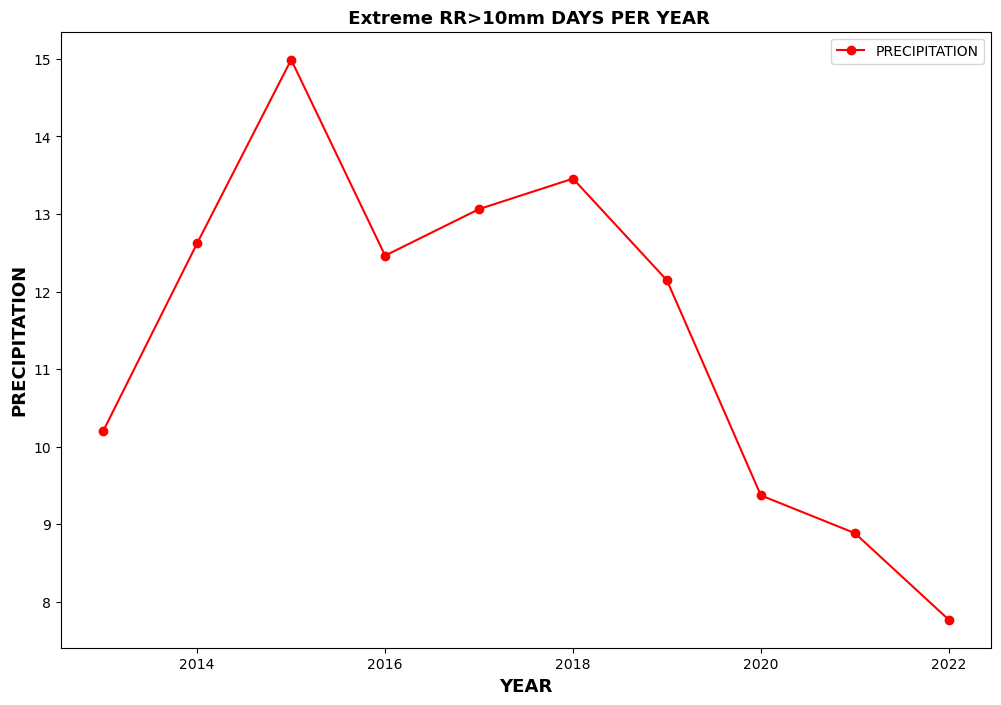

In [95]:
#plotting time series for extreme RR>20mm per year
fig,ax = plt.subplots(figsize = (12,8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xtrf20.year, Xtrf20.mean(['lon','lat']),
         color = 'red', lw = 1.5 ,
         label= 'PRECIPITATION',marker='o')
ax.set_title(' Extreme RR>10mm DAYS PER YEAR', fontweight = 'bold', fontsize=13 ,color = 'black')
ax.set_xlabel("YEAR", fontweight = 'bold',fontsize = 13, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 13, color= 'black')
plt.legend()
plt.show()

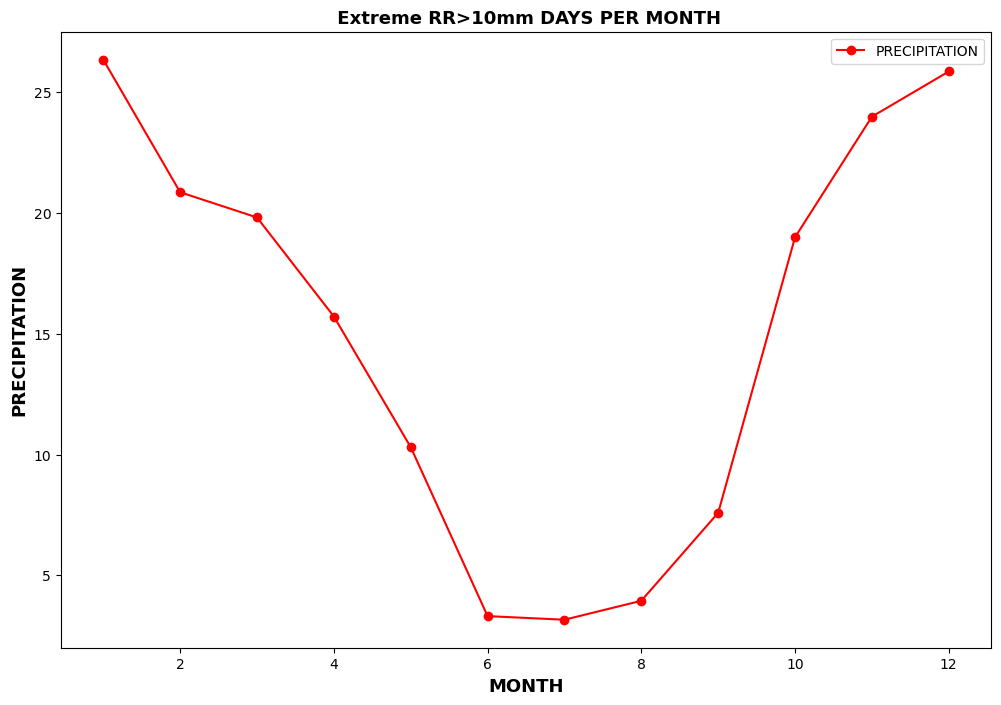

In [98]:
#plotting time series for extreme RR>10mm per month
fig,ax = plt.subplots(figsize = (12,8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xtrf10M.month, Xtrf10M.mean(['lon','lat']),
         color = 'red', lw = 1.5 ,
         label= 'PRECIPITATION',marker='o')
ax.set_title(' Extreme RR>10mm DAYS PER MONTH', fontweight = 'bold', fontsize=13 ,color = 'black')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 13, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 13, color= 'black')
plt.legend()
plt.show()

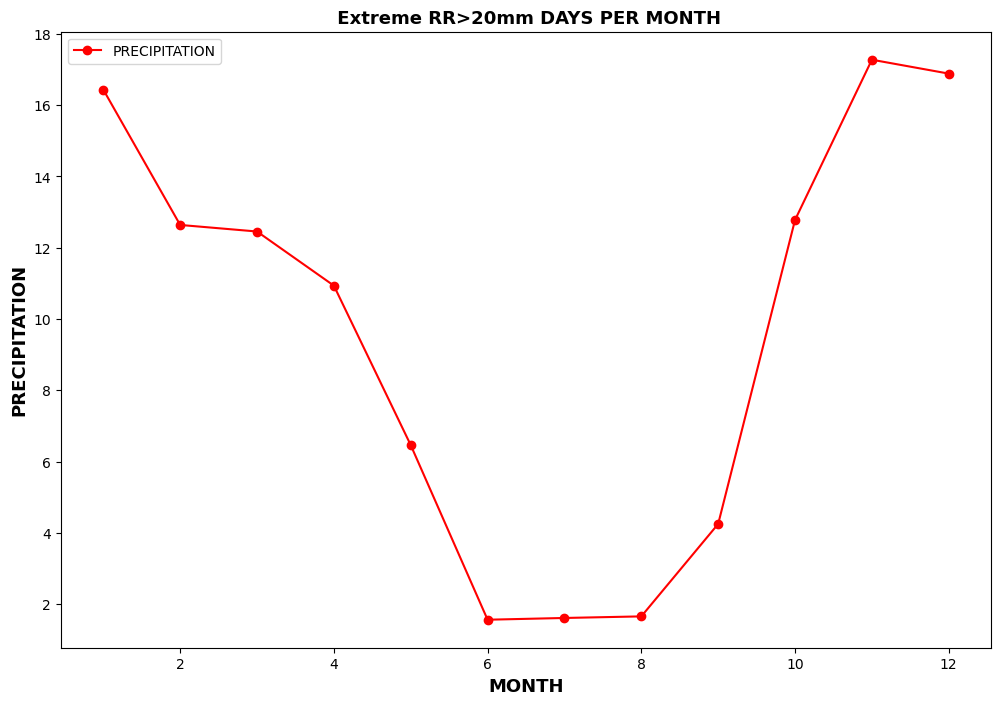

In [99]:
#plotting time series for extreme RR>10mm per month
fig,ax = plt.subplots(figsize = (12,8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
plt.plot(Xtrf20M.month, Xtrf20M.mean(['lon','lat']),
         color = 'red', lw = 1.5 ,
         label= 'PRECIPITATION',marker='o')
ax.set_title(' Extreme RR>20mm DAYS PER MONTH', fontweight = 'bold', fontsize=13 ,color = 'black')
ax.set_xlabel("MONTH", fontweight = 'bold',fontsize = 13, color= 'black')
ax.set_ylabel('PRECIPITATION', fontweight = 'bold', fontsize = 13, color= 'black')
plt.legend()
plt.show()

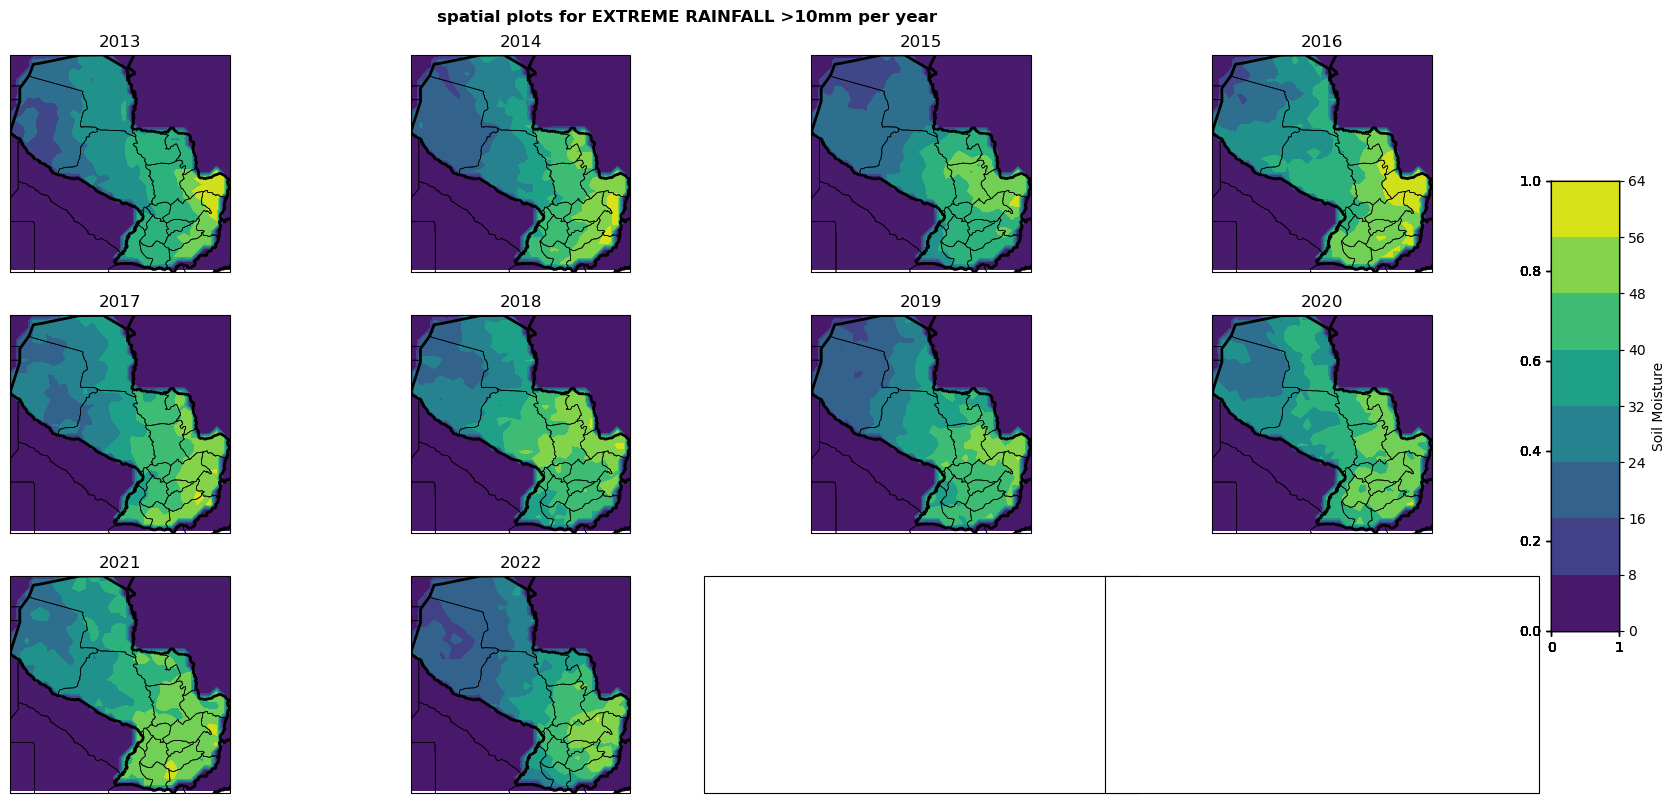

In [105]:
# spatial plots for EXTREME RAINFALL >10mm per year
fig,ax=plt.subplots(3,4,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
#month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-54.25,-62.65,-27.59,-19.29])
    
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(Xtrf10.lon, Xtrf10.lat, Xtrf10[i],
                      get_cmap='rb', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for EXTREME RAINFALL >10mm per year', fontweight='bold');
plt.savefig('9k.jpeg');


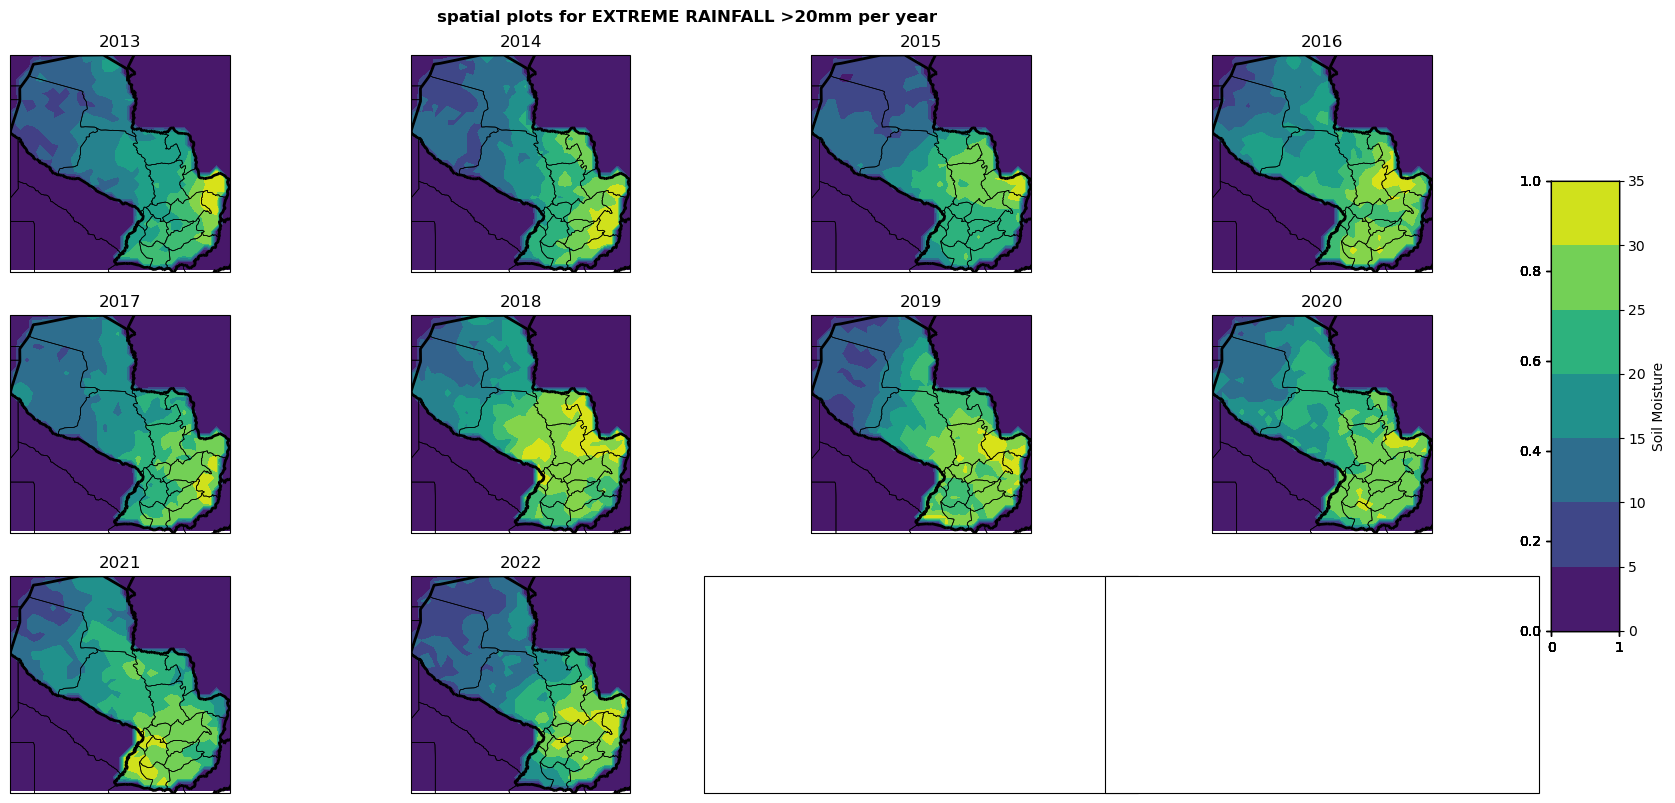

In [106]:
# spatial plots for EXTREME RAINFALL >20mm per year
fig,ax=plt.subplots(3,4,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
#month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(10):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-54.25,-62.65,-27.59,-19.29])
    
    ax[i].set_title(annual_totals.year.data[i])
    cb= ax[i].contourf(Xtrf20.lon, Xtrf20.lat, Xtrf20[i],
                      get_cmap='rb', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for EXTREME RAINFALL >20mm per year', fontweight='bold');
plt.savefig('9k.jpeg');


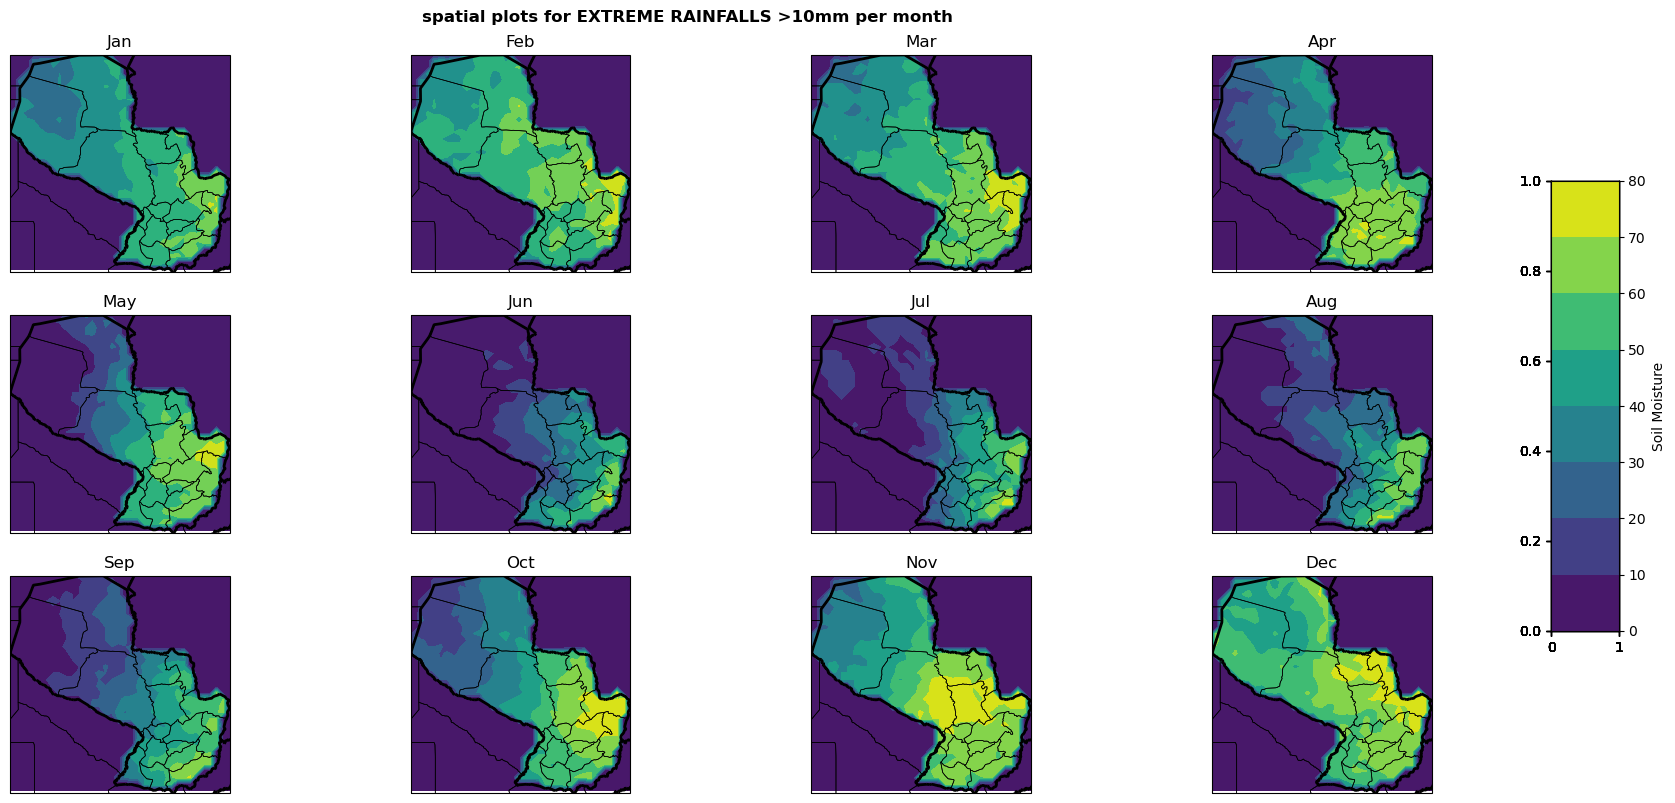

In [110]:
# spatial plots for EXTREME RAINFALLS >10mm per month
fig,ax=plt.subplots(3,4,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-54.25,-62.65,-27.59,-19.29])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(Xtrf10M.lon, Xtrf10M.lat, Xtrf10M[i],
                      get_cmap='rb', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for EXTREME RAINFALLS >10mm per month', fontweight='bold');
plt.savefig('6.jpeg');


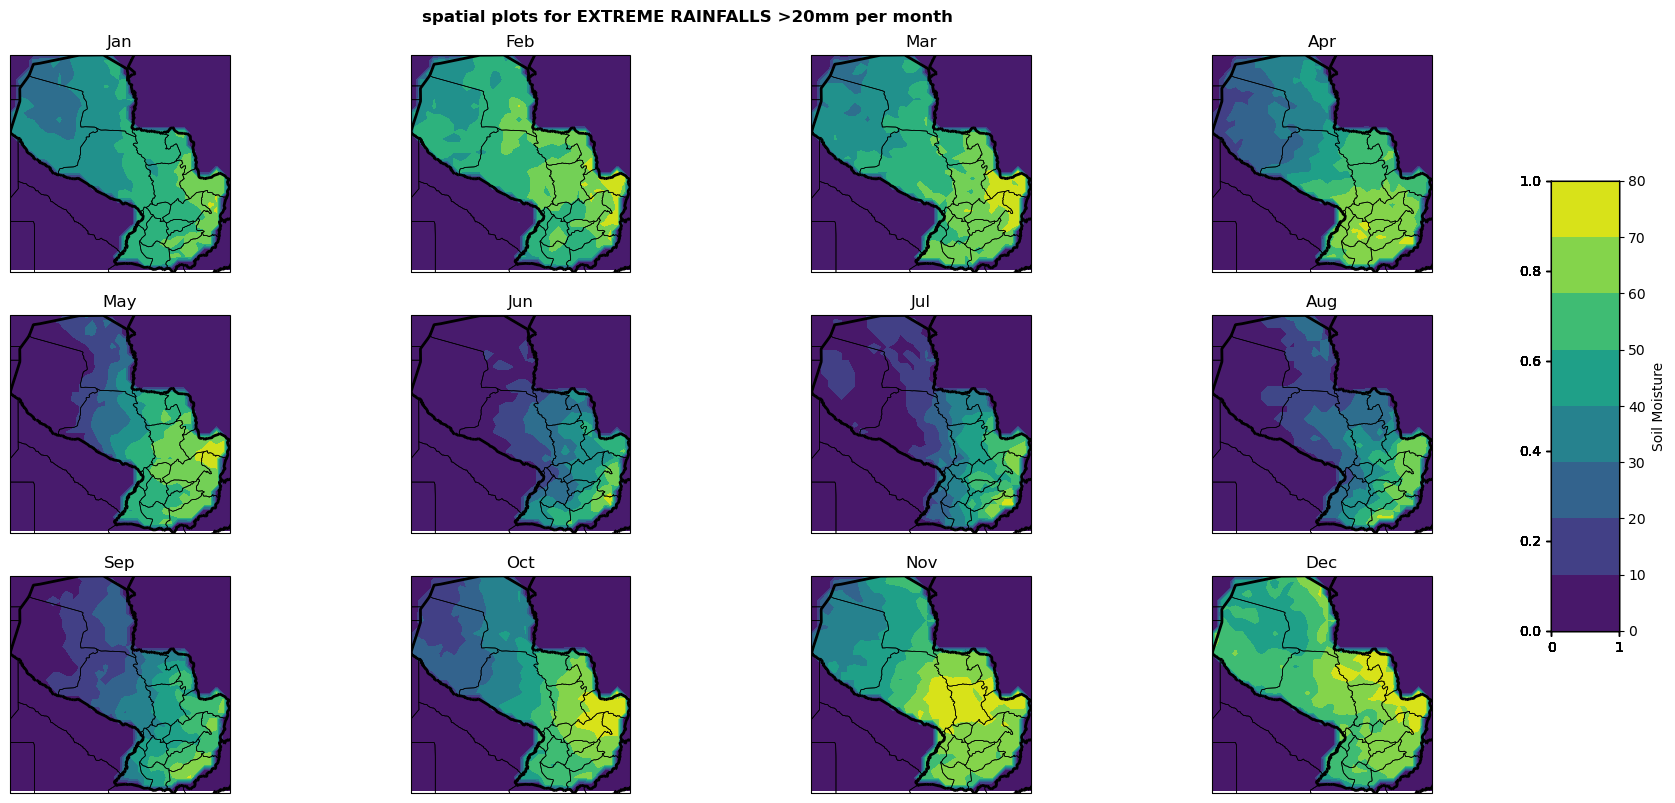

In [111]:
# spatial plots for EXTREME RAINFALLS >20mm per month
fig,ax=plt.subplots(3,4,figsize=(27,9), 
                    subplot_kw={'projection': ccrs.PlateCarree()},squeeze=0.1)
ax=ax.flatten()
month_names=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(12):
    ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
#     ax[i].add_feature(cfeature.OCEAN)
#     ax[i].add_feature(cfeature.LAKES, color='blue')
#     ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-54.25,-62.65,-27.59,-19.29])
    
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(Xtrf20M.lon, Xtrf20M.lat, Xtrf10M[i],
                      get_cmap='rb', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='Soil Moisture')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('spatial plots for EXTREME RAINFALLS >20mm per month', fontweight='bold');
plt.savefig('6.jpeg');
